In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler


In [48]:
data = pd.read_csv('../data/clean_data/data_v1.csv', index_col=0)
regression_cols = ['federal_gross_income_adj', 'fam_size', 'age', 'fam_med_costs', 'weeks_unemployed', 'hours_worked', 'sex', 'employment', 'poverty_ratio']
regression = data.loc[:,regression_cols]
sex_map = {
    "Female":0,
    "Male": 1
}
poverty_ratio_map = {
    'BELOW POVERTY LEVEL' : "Impoverished" ,
    '150 AND ABOVE THE POVERTY LEVEL' : "Not Impoverished",
    '100 - 124 PERCENT OF THE POVERTY LEVEL' : "Impoverished",
    '125 - 149 PERCENT OF THE POVERTY LEVEL' : "Impoverished",
    'NOT IN POVERTY UNIVERSE' : "NIU"
}
regression.poverty_ratio = regression.poverty_ratio.map(poverty_ratio_map)
regression = regression[regression['poverty_ratio'] != 'NIU']
regression = regression.query("employment < 2")
regression.sex = regression.sex.map(sex_map)
regression = regression.loc[regression['federal_gross_income_adj']>=0]
regression.head()

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked,sex,employment,poverty_ratio
1,0,0,67,0,0,0,0,0,Impoverished
2,9,0,74,0,0,0,1,0,Impoverished
3,0,1,66,0,0,0,0,0,Not Impoverished
4,2400,1,68,0,0,0,0,0,Not Impoverished
5,47828,1,52,50,0,0,0,0,Not Impoverished


In [49]:
x = regression.drop(columns = 'poverty_ratio', axis = 1)
y = regression.poverty_ratio
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=1111,
    test_size=0.2
)
rus = RandomUnderSampler()
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


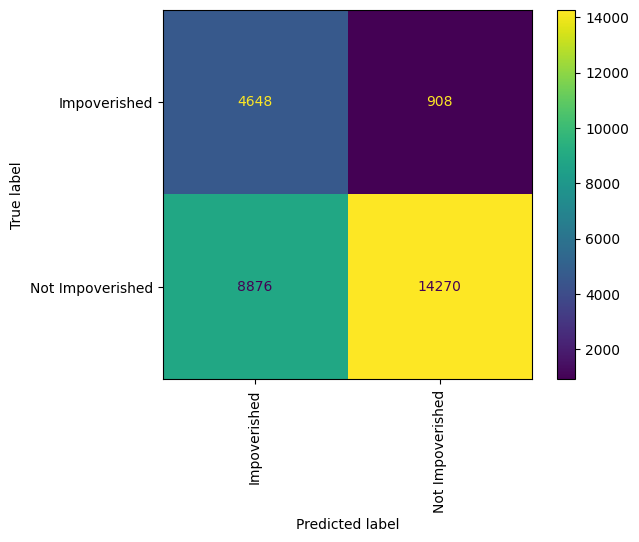

In [50]:
logreg = LogisticRegression()
logreg.fit(x_train_rus, y_train_rus)
logreg_preds = logreg.predict(x_test)
ConfusionMatrixDisplay.from_estimator(logreg, x_test, y_test, xticks_rotation='vertical')
logreg_accuracy = logreg.score(x_test, y_test)

In [51]:
logreg_accuracy

0.6591178315099993

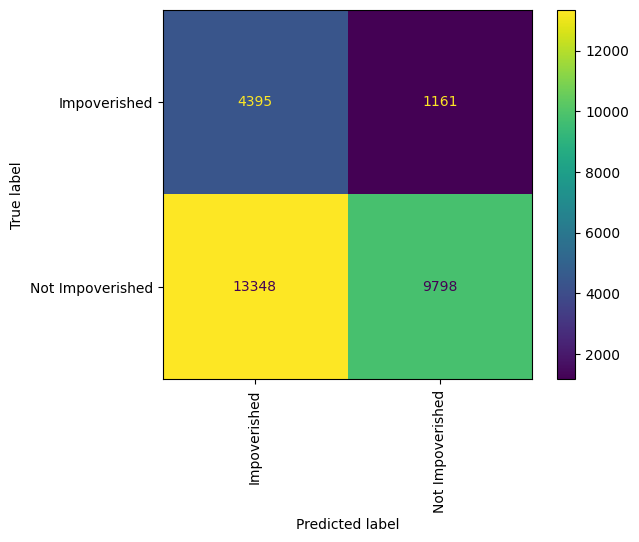

In [52]:
MNB = MultinomialNB()
MNB.fit(x_train_rus, y_train_rus)
Multinomial_Prediction = MNB.predict(x_test)
Multinomial_matrix = confusion_matrix(y_test, Multinomial_Prediction)
ConfusionMatrixDisplay.from_estimator(MNB, x_test, y_test, xticks_rotation='vertical')
Multinomial_accuracy = MNB.score(x_test, y_test)

In [53]:
Multinomial_accuracy

0.49449515713190717